**Problem Statement: Classification problem for Loan Default Prediction**

In [24]:
#importing all necessary libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_validate



In [3]:
train_data = pd.read_excel('/content/train_data.xlsx')

In [4]:
train_data.head()

,customer_id,transaction_date,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status
0,10608026,2014-01-01,C5,36 months,MORTGAGE,665,9,70000.0,16.24,debt_consolidation,7200,Individual,253.99,Verified,4648,11,0
1,10235120,2014-01-01,E5,36 months,MORTGAGE,660,8,65000.0,23.40,home_improvement,6000,Individual,233.52,Source Verified,14051,11,1
2,10705805,2014-01-01,D2,36 months,MORTGAGE,660,7,73000.0,17.57,other,8000,Individual,287.50,Verified,14885,11,0
3,11044991,2014-01-01,B4,36 months,MORTGAGE,690,5,118000.0,12.85,debt_consolidation,10000,Individual,336.22,Source Verified,7542,2,1
4,10161054,2014-01-01,C3,60 months,MORTGAGE,665,5,63000.0,14.98,debt_consolidation,10000,Individual,237.80,Verified,6318,11,0


In [11]:
train_data.describe()
#checking if outliers are present

,cibil_score,total_no_of_acc,annual_inc,int_rate,loan_amnt,installment,account_bal,emp_length,loan_status
count,113705.000000,113705.000000,1.137050e+05,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000
mean,684.398707,0.272934,7.138822e+04,15.955469,15158.144980,454.241150,15820.487094,5.959782,0.738895
std,22.871241,0.647328,6.050616e+04,3.234215,9091.279851,268.251678,20447.614824,4.229570,0.439239
min,660.000000,0.000000,0.000000e+00,12.050000,1000.000000,33.240000,0.000000,0.000000,0.000000
25%,665.000000,0.000000,4.300000e+04,13.330000,8000.000000,265.740000,5656.000000,2.000000,0.000000
50%,680.000000,0.000000,6.000000e+04,14.990000,13300.000000,388.290000,10841.000000,6.000000,1.000000
75%,695.000000,0.000000,8.500000e+04,17.860000,20225.000000,599.530000,19682.000000,11.000000,1.000000
max,845.000000,10.000000,8.900060e+06,28.990000,40000.000000,1460.430000,875598.000000,11.000000,1.000000


In [12]:
train_data.nunique()

,0
sub_grade,27
term,2
home_ownership,3
cibil_score,38
total_no_of_acc,11
annual_inc,10471
int_rate,116
purpose,13
loan_amnt,1360
installment,28106


In [5]:
#checking if dataset contains any null value
train_data.isnull().sum()

,0
customer_id,0
transaction_date,0
sub_grade,0
term,0
home_ownership,0
cibil_score,0
total_no_of_acc,0
annual_inc,0
int_rate,0
purpose,0


In [6]:
#dropping customer_id as we are not solving problem for specific person and dropping Application_type: In dataset, it is  "Individual," so it could be redundant.Aslo dropping transaction_date as it does not affect on status
train_data= train_data.drop(columns=['customer_id', 'transaction_date', 'application_type'])

In [7]:
train_data

,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,installment,verification_status,account_bal,emp_length,loan_status
0,C5,36 months,MORTGAGE,665,9,70000.0,16.24,debt_consolidation,7200,253.99,Verified,4648,11,0
1,E5,36 months,MORTGAGE,660,8,65000.0,23.40,home_improvement,6000,233.52,Source Verified,14051,11,1
2,D2,36 months,MORTGAGE,660,7,73000.0,17.57,other,8000,287.50,Verified,14885,11,0
3,B4,36 months,MORTGAGE,690,5,118000.0,12.85,debt_consolidation,10000,336.22,Source Verified,7542,2,1
4,C3,60 months,MORTGAGE,665,5,63000.0,14.98,debt_consolidation,10000,237.80,Verified,6318,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113700,D1,36 months,RENT,670,0,53000.0,16.29,credit_card,10000,353.01,Source Verified,14609,11,0
113701,D2,36 months,OWN,660,0,40000.0,17.27,debt_consolidation,7025,251.41,Source Verified,10250,2,1
113702,D1,36 months,RENT,690,0,25000.0,16.29,credit_card,10000,353.01,Not Verified,6395,3,0
113703,C5,36 months,MORTGAGE,680,0,80000.0,15.31,debt_consolidation,12625,439.57,Verified,3882,7,0


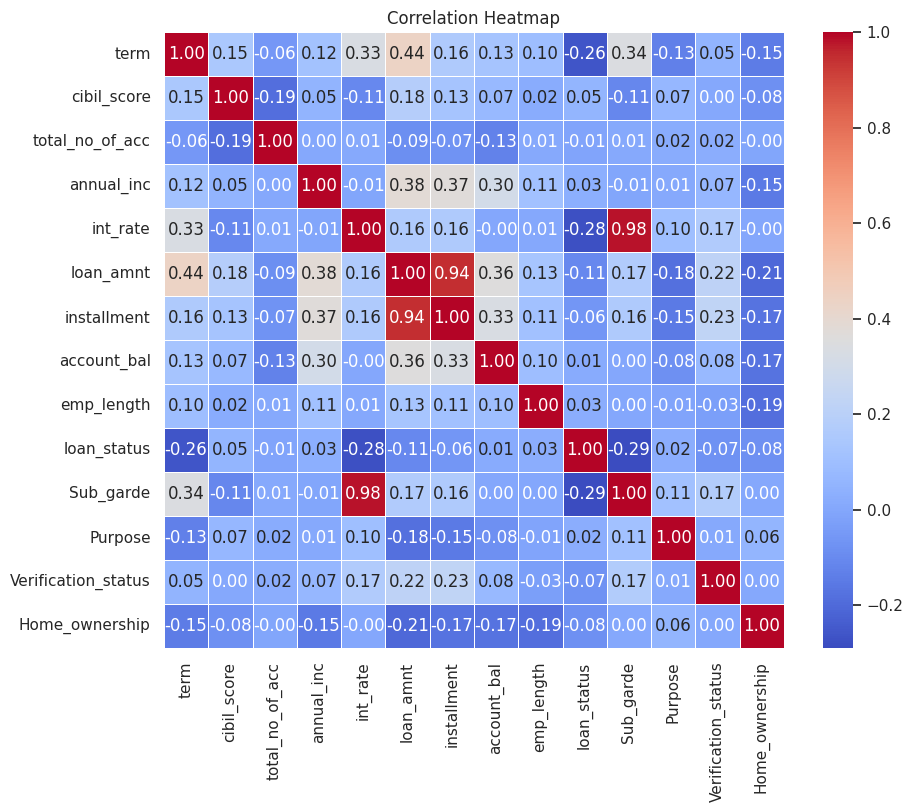

In [57]:
#creating heatmap for better understanding of relationship between the features
corr_matrix = train_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust size of the figure as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Heatmap')
plt.show()

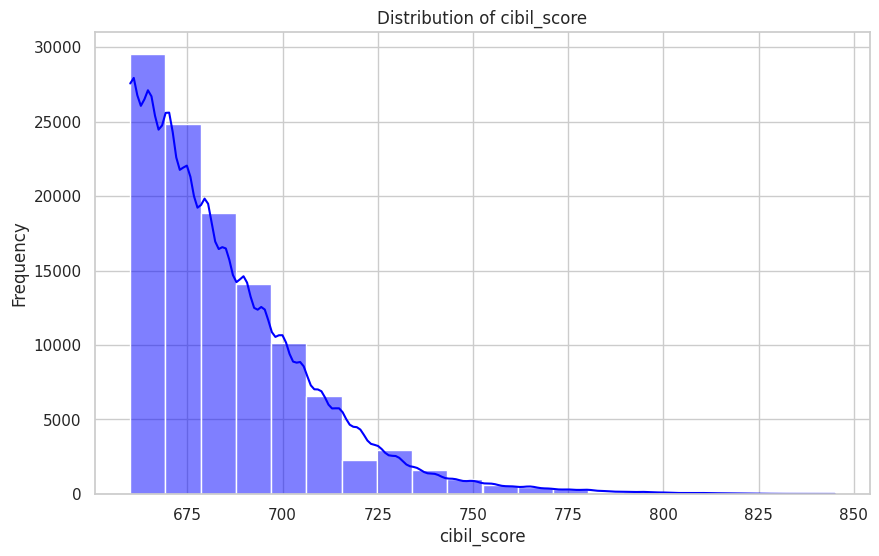

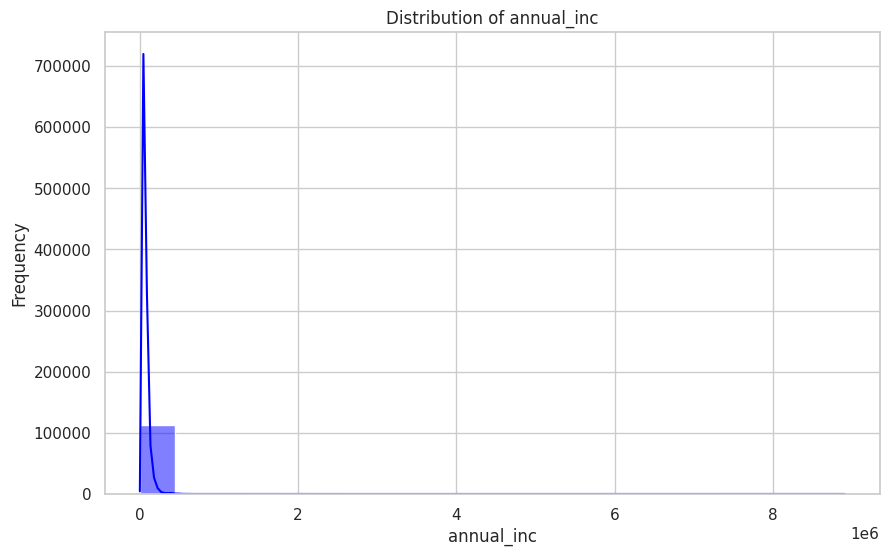

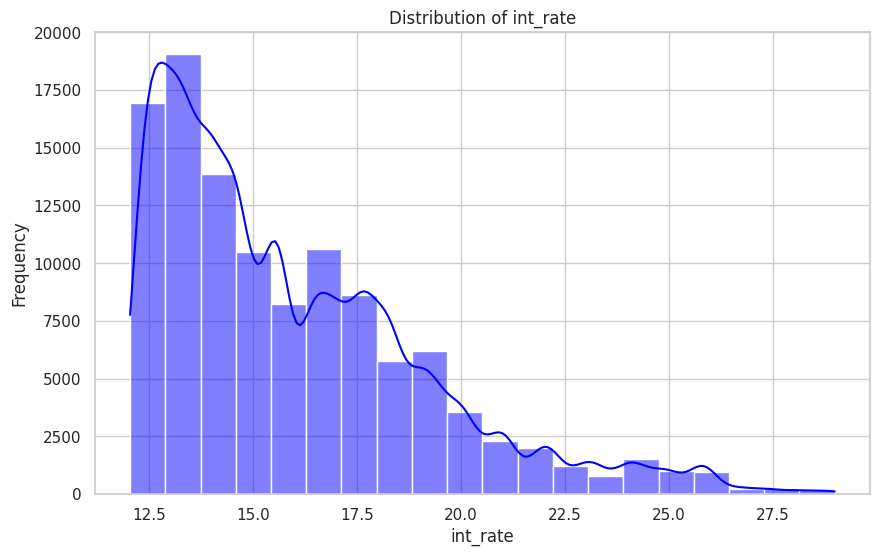

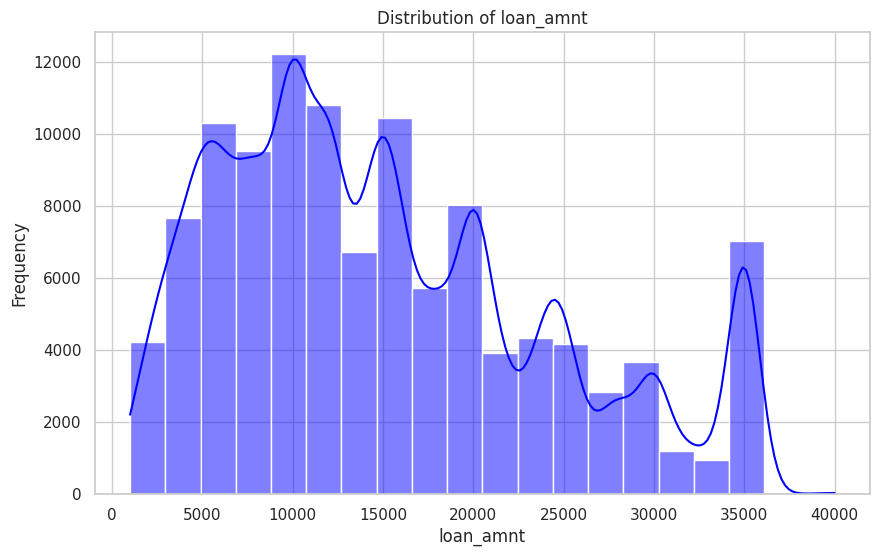

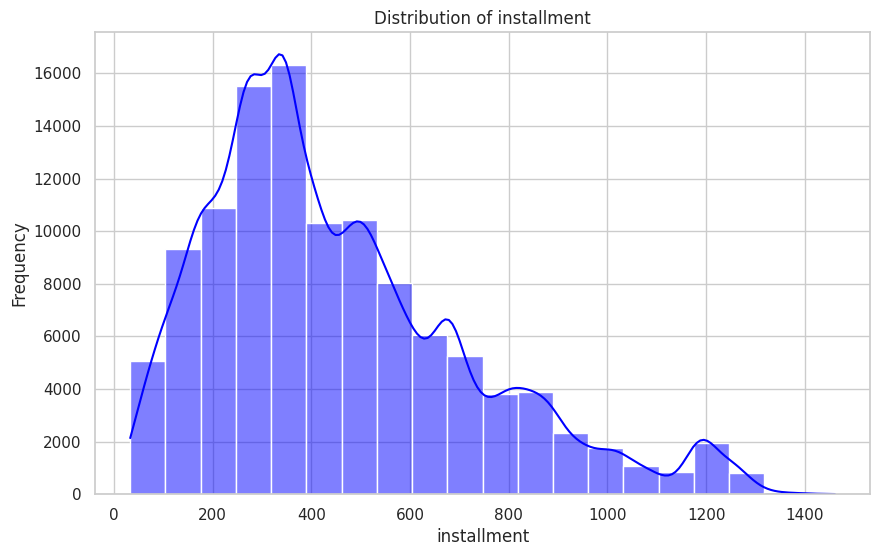

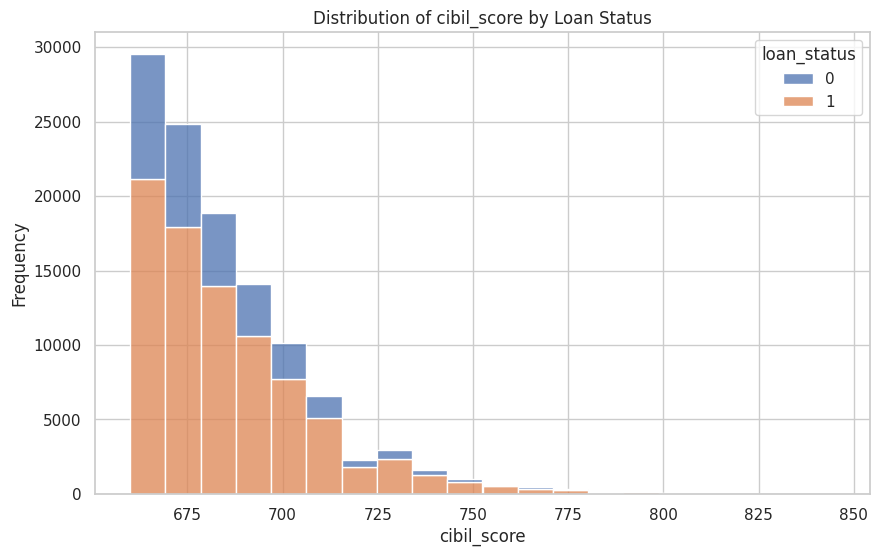

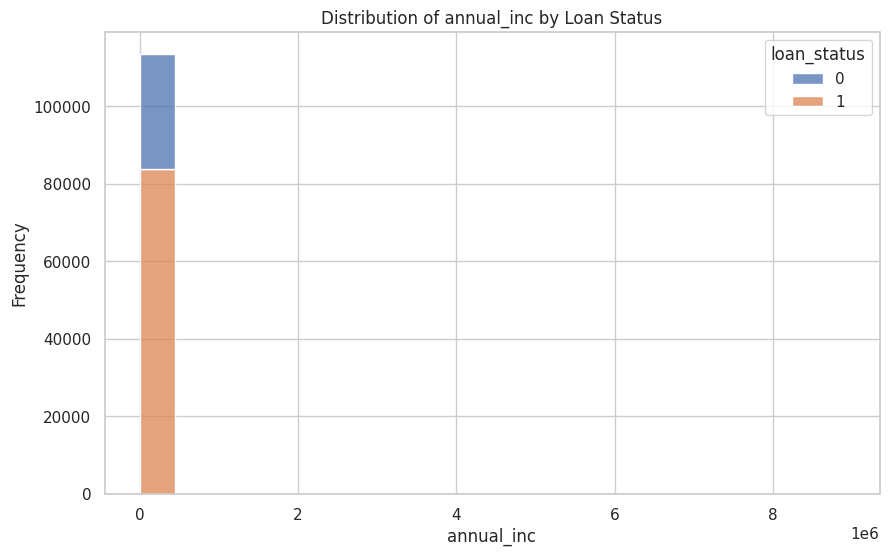

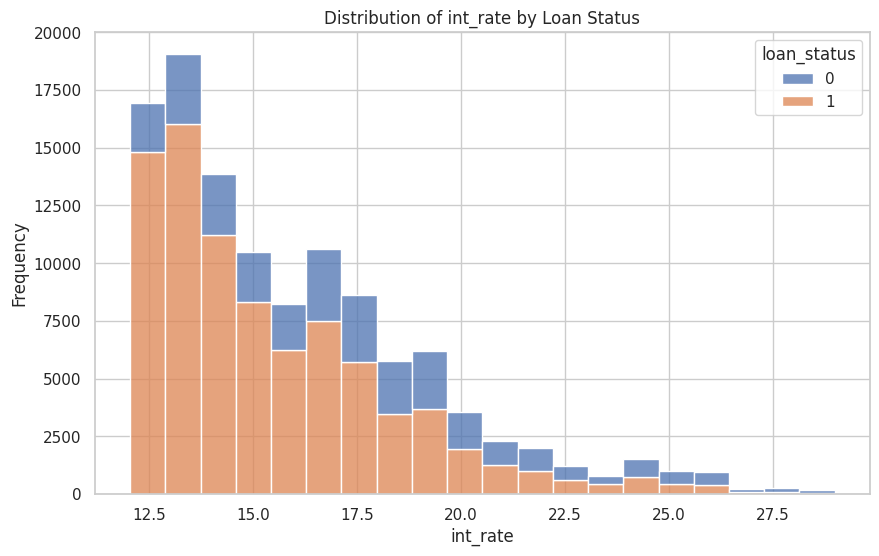

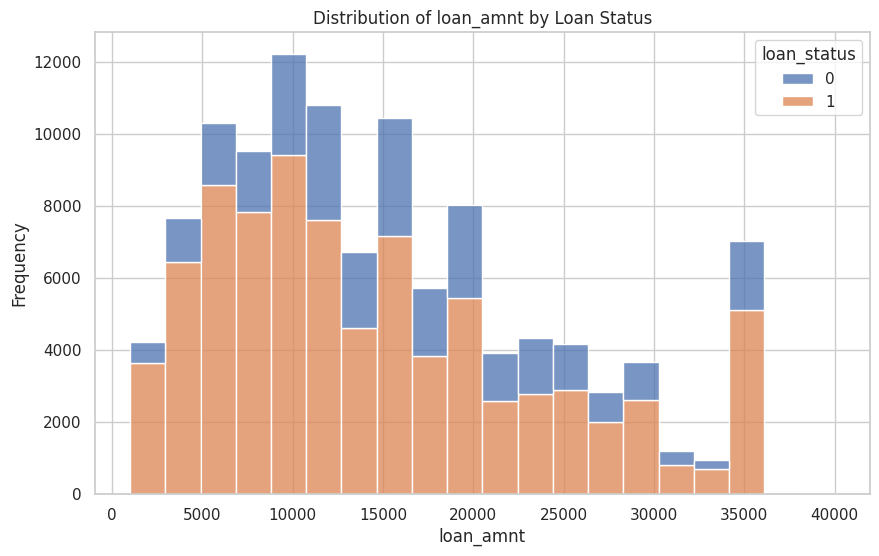

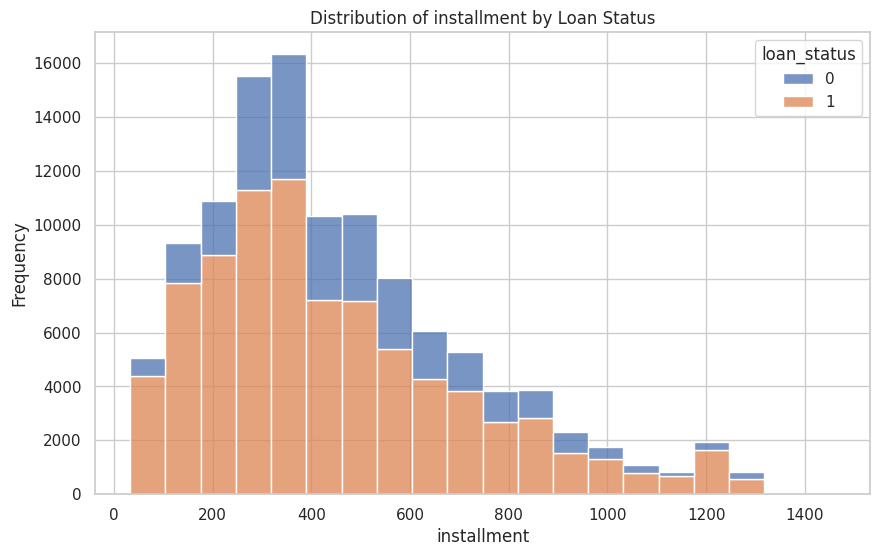

In [10]:
numerical_features = ['cibil_score', 'annual_inc', 'int_rate', 'loan_amnt', 'installment']

# Set up the plotting style
sns.set(style="whitegrid")

# Loop through the numerical features and plot histograms
for feature in numerical_features:
    plt.figure(figsize=(10, 6))

    # Plot histogram for the feature
    sns.histplot(train_data[feature], kde=True, bins=20, color="blue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# If you want to check the distribution by loan_status (target variable)
for feature in numerical_features:
    plt.figure(figsize=(10, 6))

    # Plot histogram grouped by loan_status
    sns.histplot(train_data, x=feature, hue="loan_status", multiple="stack", bins=20)
    plt.title(f"Distribution of {feature} by Loan Status")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

In [22]:
#Label Encoding
unique_values = X_train['sub_grade'].unique()
print(unique_values)

['C3' 'E1' 'C4' 'D4' 'D1' 'F4' 'C2' 'B5' 'C1' 'D2' 'E2' 'D3' 'F1' 'C5'
 'B4' 'E5' 'F3' 'G3' 'G1' 'E4' 'E3' 'G5' 'D5' 'G2' 'F2' 'F5' 'G4']


In [26]:
label_encode=LabelEncoder()


In [28]:
labels=label_encode.fit_transform(train_data.sub_grade)
print(labels)

[ 6 16  8 ...  7  6 12]


In [29]:
train_data['Sub_garde']=labels

In [30]:
train_data

,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,installment,verification_status,account_bal,emp_length,loan_status,Sub_garde
0,C5,36 months,MORTGAGE,665,9,70000.0,16.24,debt_consolidation,7200,253.99,Verified,4648,11,0,6
1,E5,36 months,MORTGAGE,660,8,65000.0,23.40,home_improvement,6000,233.52,Source Verified,14051,11,1,16
2,D2,36 months,MORTGAGE,660,7,73000.0,17.57,other,8000,287.50,Verified,14885,11,0,8
3,B4,36 months,MORTGAGE,690,5,118000.0,12.85,debt_consolidation,10000,336.22,Source Verified,7542,2,1,0
4,C3,60 months,MORTGAGE,665,5,63000.0,14.98,debt_consolidation,10000,237.80,Verified,6318,11,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113700,D1,36 months,RENT,670,0,53000.0,16.29,credit_card,10000,353.01,Source Verified,14609,11,0,7
113701,D2,36 months,OWN,660,0,40000.0,17.27,debt_consolidation,7025,251.41,Source Verified,10250,2,1,8
113702,D1,36 months,RENT,690,0,25000.0,16.29,credit_card,10000,353.01,Not Verified,6395,3,0,7
113703,C5,36 months,MORTGAGE,680,0,80000.0,15.31,debt_consolidation,12625,439.57,Verified,3882,7,0,6


In [31]:
mapping = dict(zip(label_encode.classes_, label_encode.transform(label_encode.classes_)))
print(mapping)
#checking the values  ecoded according to the corresponding data

{'B4': 0, 'B5': 1, 'C1': 2, 'C2': 3, 'C3': 4, 'C4': 5, 'C5': 6, 'D1': 7, 'D2': 8, 'D3': 9, 'D4': 10, 'D5': 11, 'E1': 12, 'E2': 13, 'E3': 14, 'E4': 15, 'E5': 16, 'F1': 17, 'F2': 18, 'F3': 19, 'F4': 20, 'F5': 21, 'G1': 22, 'G2': 23, 'G3': 24, 'G4': 25, 'G5': 26}


In [32]:
#label encoding to purpose feature
label_encoder=LabelEncoder()
purpose_label=label_encoder.fit_transform(train_data.purpose)
train_data['Purpose']=purpose_label


In [38]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(mapping)

{'car': 0, 'credit_card': 1, 'debt_consolidation': 2, 'home_improvement': 3, 'house': 4, 'major_purchase': 5, 'medical': 6, 'moving': 7, 'other': 8, 'renewable_energy': 9, 'small_business': 10, 'vacation': 11, 'wedding': 12}


In [33]:
train_data

,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,installment,verification_status,account_bal,emp_length,loan_status,Sub_garde,Purpose
0,C5,36 months,MORTGAGE,665,9,70000.0,16.24,debt_consolidation,7200,253.99,Verified,4648,11,0,6,2
1,E5,36 months,MORTGAGE,660,8,65000.0,23.40,home_improvement,6000,233.52,Source Verified,14051,11,1,16,3
2,D2,36 months,MORTGAGE,660,7,73000.0,17.57,other,8000,287.50,Verified,14885,11,0,8,8
3,B4,36 months,MORTGAGE,690,5,118000.0,12.85,debt_consolidation,10000,336.22,Source Verified,7542,2,1,0,2
4,C3,60 months,MORTGAGE,665,5,63000.0,14.98,debt_consolidation,10000,237.80,Verified,6318,11,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113700,D1,36 months,RENT,670,0,53000.0,16.29,credit_card,10000,353.01,Source Verified,14609,11,0,7,1
113701,D2,36 months,OWN,660,0,40000.0,17.27,debt_consolidation,7025,251.41,Source Verified,10250,2,1,8,2
113702,D1,36 months,RENT,690,0,25000.0,16.29,credit_card,10000,353.01,Not Verified,6395,3,0,7,1
113703,C5,36 months,MORTGAGE,680,0,80000.0,15.31,debt_consolidation,12625,439.57,Verified,3882,7,0,6,2


In [34]:
#dropping the ecoded columns
train_data = train_data.drop(columns=['purpose'])
train_data = train_data.drop(columns=['sub_grade'])


In [37]:
train_data

,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,loan_amnt,installment,verification_status,account_bal,emp_length,loan_status,Sub_garde,Purpose,Verification_status
0,36 months,MORTGAGE,665,9,70000.0,16.24,7200,253.99,Verified,4648,11,0,6,2,2
1,36 months,MORTGAGE,660,8,65000.0,23.40,6000,233.52,Source Verified,14051,11,1,16,3,1
2,36 months,MORTGAGE,660,7,73000.0,17.57,8000,287.50,Verified,14885,11,0,8,8,2
3,36 months,MORTGAGE,690,5,118000.0,12.85,10000,336.22,Source Verified,7542,2,1,0,2,1
4,60 months,MORTGAGE,665,5,63000.0,14.98,10000,237.80,Verified,6318,11,0,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113700,36 months,RENT,670,0,53000.0,16.29,10000,353.01,Source Verified,14609,11,0,7,1,1
113701,36 months,OWN,660,0,40000.0,17.27,7025,251.41,Source Verified,10250,2,1,8,2,1
113702,36 months,RENT,690,0,25000.0,16.29,10000,353.01,Not Verified,6395,3,0,7,1,0
113703,36 months,MORTGAGE,680,0,80000.0,15.31,12625,439.57,Verified,3882,7,0,6,2,2


In [36]:
#label encoding for verification_status
verification =LabelEncoder()
verification_label=verification.fit_transform(train_data.verification_status)
train_data['Verification_status']=verification_label



In [39]:
mapping = dict(zip(verification .classes_, verification .transform(verification .classes_)))
print(mapping)

{'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}


In [40]:
#droping  previous verification_status
train_data = train_data.drop(columns=['verification_status'])


In [42]:
#label encoding for home_ownership
home_label=LabelEncoder()
home_owe=home_label.fit_transform(train_data.home_ownership)
train_data['Home_ownership']=home_owe


In [43]:
train_data


,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,loan_amnt,installment,account_bal,emp_length,loan_status,Sub_garde,Purpose,Verification_status,Home_ownership
0,36 months,MORTGAGE,665,9,70000.0,16.24,7200,253.99,4648,11,0,6,2,2,0
1,36 months,MORTGAGE,660,8,65000.0,23.40,6000,233.52,14051,11,1,16,3,1,0
2,36 months,MORTGAGE,660,7,73000.0,17.57,8000,287.50,14885,11,0,8,8,2,0
3,36 months,MORTGAGE,690,5,118000.0,12.85,10000,336.22,7542,2,1,0,2,1,0
4,60 months,MORTGAGE,665,5,63000.0,14.98,10000,237.80,6318,11,0,4,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113700,36 months,RENT,670,0,53000.0,16.29,10000,353.01,14609,11,0,7,1,1,2
113701,36 months,OWN,660,0,40000.0,17.27,7025,251.41,10250,2,1,8,2,1,1
113702,36 months,RENT,690,0,25000.0,16.29,10000,353.01,6395,3,0,7,1,0,2
113703,36 months,MORTGAGE,680,0,80000.0,15.31,12625,439.57,3882,7,0,6,2,2,0


In [44]:
#droping  previous verification_status
train_data = train_data.drop(columns=['home_ownership'])

In [47]:
train_data['term'] = train_data['term'].astype(str).str.replace(' months', '').astype(int)

In [48]:
train_data

,term,cibil_score,total_no_of_acc,annual_inc,int_rate,loan_amnt,installment,account_bal,emp_length,loan_status,Sub_garde,Purpose,Verification_status,Home_ownership
0,36,665,9,70000.0,16.24,7200,253.99,4648,11,0,6,2,2,0
1,36,660,8,65000.0,23.40,6000,233.52,14051,11,1,16,3,1,0
2,36,660,7,73000.0,17.57,8000,287.50,14885,11,0,8,8,2,0
3,36,690,5,118000.0,12.85,10000,336.22,7542,2,1,0,2,1,0
4,60,665,5,63000.0,14.98,10000,237.80,6318,11,0,4,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113700,36,670,0,53000.0,16.29,10000,353.01,14609,11,0,7,1,1,2
113701,36,660,0,40000.0,17.27,7025,251.41,10250,2,1,8,2,1,1
113702,36,690,0,25000.0,16.29,10000,353.01,6395,3,0,7,1,0,2
113703,36,680,0,80000.0,15.31,12625,439.57,3882,7,0,6,2,2,0


In [49]:
#spliting data into training and testing
X = train_data.drop(columns=['loan_status'])

# Output/Target: The 'loan_status' column
Y = train_data['loan_status']

# Check the features and target
print(X.head())  # Features (input variables)
print(Y.head())

   term  cibil_score  total_no_of_acc  annual_inc  int_rate  loan_amnt  \
0    36          665                9     70000.0     16.24       7200   
1    36          660                8     65000.0     23.40       6000   
2    36          660                7     73000.0     17.57       8000   
3    36          690                5    118000.0     12.85      10000   
4    60          665                5     63000.0     14.98      10000   

   installment  account_bal  emp_length  Sub_garde  Purpose  \
0       253.99         4648          11          6        2   
1       233.52        14051          11         16        3   
2       287.50        14885          11          8        8   
3       336.22         7542           2          0        2   
4       237.80         6318          11          4        2   

   Verification_status  Home_ownership  
0                    2               0  
1                    1               0  
2                    2               0  
3           

In [53]:
# Split the data into 80% training and 20% testing (you can change the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

Training data shape: (90964, 13), Testing data shape: (22741, 13)


In [54]:
#training model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X,Y)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5917
           1       1.00      1.00      1.00     16824

    accuracy                           1.00     22741
   macro avg       1.00      1.00      1.00     22741
weighted avg       1.00      1.00      1.00     22741

Confusion Matrix:
[[ 5917     0]
 [    0 16824]]


In [56]:
# Example of a single new data point with corrected column name
new_data_single = {
    'term': [36],
    'cibil_score': [665],
    'total_no_of_acc': [9],
    'annual_inc': [70000.0],
    'int_rate': [16.24],
    'loan_amnt': [7200],
    'installment': [253.99],
    'account_bal': [4648],
    'emp_length': [11],
    'Sub_garde': [6],
    'Purpose': [2],
    'Verification_status': [2],
    'Home_ownership': [0]
}


new_data_single_df = pd.DataFrame(new_data_single)



# Predict using the trained model
prediction = rf_model.predict(new_data_single_df)

# Display the prediction
print(f"Prediction for the single data point: {prediction}")


Prediction for the single data point: [0]


Why to choose Random forest algorithm?

The problem of loan defualt prediction is of classification type and
Random Forest is a strong, versatile, and robust algorithm for this problem of predicting loan status, as it can handle mixed data types, capture complex relationships, and provide feature importance insights. Its ability to manage non-linearities and provide good generalization with minimal preprocessing makes it a solid choice for this classification task.